### ==========================================================================================
# PART 2: COVNET MODEL ARCHITECTURE EXPLORATION
### ==========================================================================================

In [1]:
import os
import tensorflow as tf
from datetime import datetime
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# project folder
path_project = 'E:/DeepLearning/breast_cancer/IDC_regular_ps50_idx5/'

# set train, validate, and test folders
dir_train = os.path.join(path_project, '_train')
dir_valid = os.path.join(path_project, '_validate')

### Ensure Tensorflow is running on GPU

In [3]:
# CMD window outout must be: Device mapping /job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX1080Ti
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

### Function to train model

In [4]:
def train_model(model_x, lr, epochs, epoch_steps, valid_steps, batch_size, image_size):
    model = model_x(lr=lr, image_size=image_size)
    
    print('Model:', model_x)
    print('Batch Size:', batch_size)
    print('Learning Rate:', lr)
    print('Epochs:', epochs)
    print('Steps per Epoch:', epoch_steps)
    print('Validation Steps:', valid_steps)
    print('Image Size:', image_size)
    print('_' * 65, '\n')
        
    print('Training Set:')    
    datagen_train = ImageDataGenerator(rescale=1./255)
    gen_train = datagen_train.flow_from_directory(dir_train, target_size=image_size, batch_size=batch_size, class_mode='binary')
    
    print('Validation Set:')    
    datagen_valid = ImageDataGenerator(rescale=1./255)
    gen_valid = datagen_valid.flow_from_directory(dir_valid, target_size=image_size, batch_size=batch_size, class_mode='binary')
    print('_' * 65, '\n')

    print('Model training started...\n')
    
    t0 = datetime.now()
    with tf.device('/gpu:0'):
        history = model.fit_generator(gen_train, steps_per_epoch=epoch_steps, epochs=epochs, validation_data=gen_valid, 
                                                                                                validation_steps=valid_steps)
    
    elpased_time = str(datetime.now() - t0).split('.')[0]    
    hours = elpased_time.split(':')[0]
    minutes = elpased_time.split(':')[1]
    seconds = elpased_time.split(':')[2]
    
    print('\nTraining process completed in:', int(hours), 'h', int(minutes), 'm', int(seconds), 's')                    
    print('#' * 120, '\n')
    
    return (history, elpased_time, model)

### Function to plot model training results

In [5]:
def plot_training(acc, val_acc, loss, val_loss):
    epochs = range(1, len(acc) + 1)   
    plt.style.use('ggplot')    
    plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        
    plt.subplot(121, facecolor='whitesmoke')    
    plt.plot(epochs, acc, 'bo', label='Training acc', color='steelblue')
    plt.plot(epochs, val_acc, 'b', label='Validation acc', color='tomato')
    plt.title('Training and validation accuracy', size=20, weight='bold', color='#444444')
    plt.xticks(size=13)
    plt.yticks(size=13)
    plt.legend(loc='best', fontsize=14)
         
    plt.subplot(122, facecolor='whitesmoke')    
    plt.plot(epochs, loss, 'bo', label='Training loss', color='steelblue')
    plt.plot(epochs, val_loss, 'b', label='Validation loss', color='tomato')
    plt.title('Training and validation loss', size=20, weight='bold', color='#444444')
    plt.xticks(size=13)
    plt.yticks(size=13)    
    plt.legend(loc='best', fontsize=14)
        
    plt.subplots_adjust(wspace=0.3)    
    plt.show()

### MODEL 1 ---------------------------------------------------------

#### Define model architecture

In [6]:
def model_1(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

#### Initialize and train model

In [7]:
logs = train_model(model_1, lr=0.01, epochs=20, epoch_steps=20, valid_steps=20, batch_size=50, image_size=(50, 50))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               17334400  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model: <function model_1 at 0x00000229AA5CA0D0>
Batch Size: 50
Learning Rate: 0.01
Epochs: 20
Steps per Epoch: 20
Validation Steps

#### Plot model training history

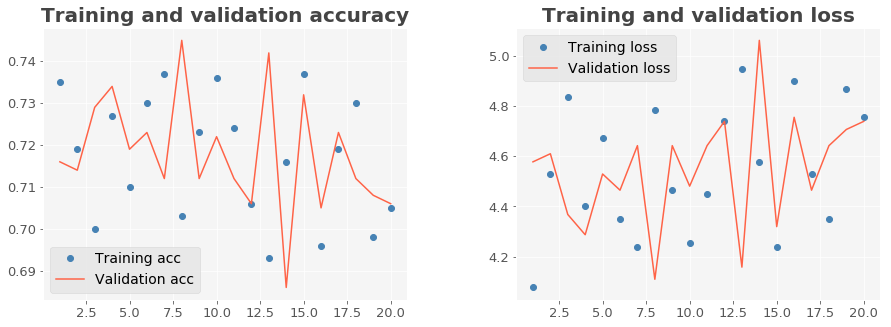

In [8]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 2 ---------------------------------------------------------

In [9]:
def model_2(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [10]:
logs = train_model(model_2, lr=0.001, epochs=20, epoch_steps=20, valid_steps=20, batch_size=50, image_size=(50, 50))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               17334400  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model: <function model_2 at 0x00000229D2E69510>
Batch Size: 50
Learning Rate: 0.001
Epochs: 20
Steps per Epoch: 20
Validation Step

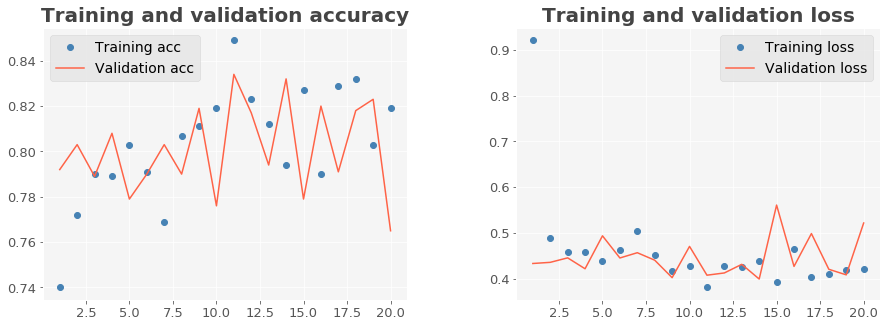

In [11]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 3 ---------------------------------------------------------

In [12]:
def model_3(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [13]:
logs = train_model(model_3, lr=0.0001, epochs=20, epoch_steps=20, valid_steps=20, batch_size=50, image_size=(50, 50))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               17334400  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model: <function model_3 at 0x00000229D2658AE8>
Batch Size: 50
Learning Rate: 0.0001
Epochs: 20
Steps per Epoch: 20
Validation Ste

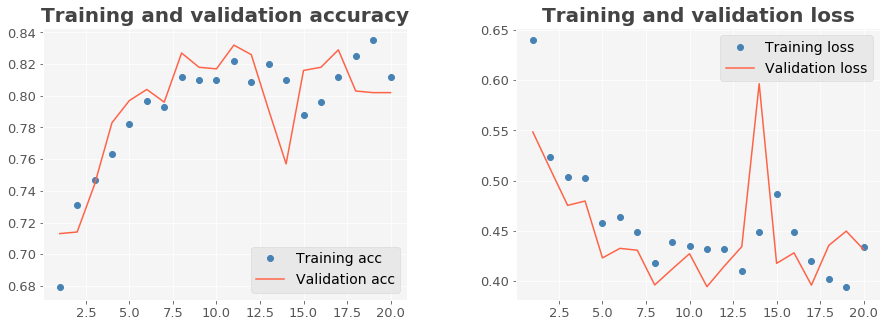

In [14]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 4 ---------------------------------------------------------

In [15]:
def model_4(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [16]:
logs = train_model(model_4, lr=0.00001, epochs=20, epoch_steps=20, valid_steps=20, batch_size=50, image_size=(50, 50))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               17334400  
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model: <function model_4 at 0x00000229D26588C8>
Batch Size: 50
Learning Rate: 1e-05
Epochs: 20
Steps per Epoch: 20
Validation Step

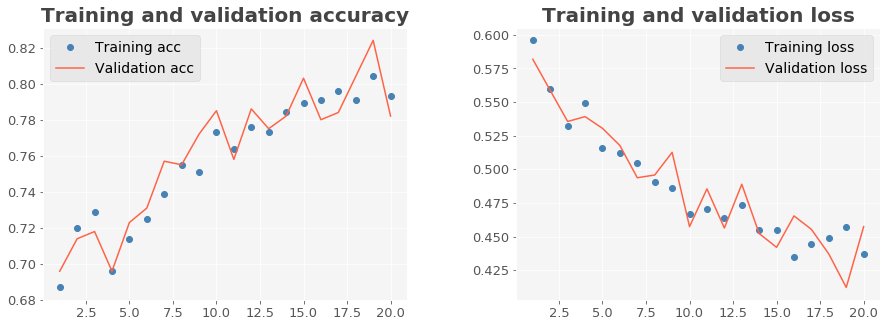

In [17]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 5 ---------------------------------------------------------

In [18]:
def model_5(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [19]:
logs = train_model(model_5, lr=0.00001, epochs=50, epoch_steps=50, valid_steps=50, batch_size=50, image_size=(50, 50))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               17334400  
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model: <function model_5 at 0x00000229D2D6DB70>
Batch Size: 50
Learning Rate: 1e-05
Epochs: 50
Steps per Epoch: 50
Validation Step

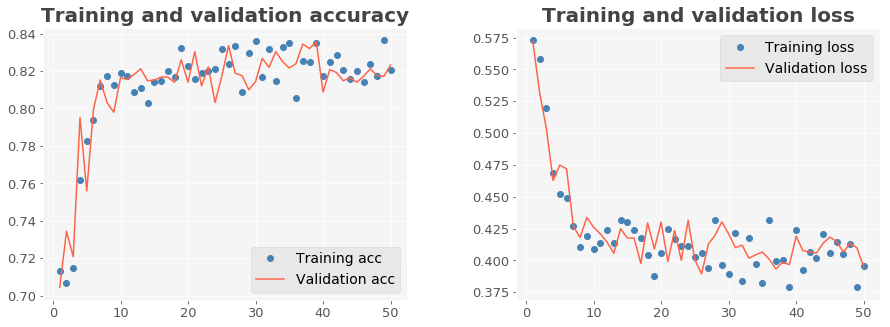

In [20]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 6 ---------------------------------------------------------

In [21]:
def model_6(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [22]:
logs = train_model(model_6, lr=0.00001, epochs=200, epoch_steps=200, valid_steps=200, batch_size=50, image_size=(50, 50))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_6 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               17334400  
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model: <function model_6 at 0x00000229D2CD2950>
Batch Size: 50
Learning Rate: 1e-05
Epochs: 200
Steps per Epoch: 200
Validation St

200/200 [==============================] - 7s 36ms/step - loss: 0.3672 - acc: 0.8383 - val_loss: 0.3875 - val_acc: 0.8300
Epoch 52/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3793 - acc: 0.8350 - val_loss: 0.3921 - val_acc: 0.8253
Epoch 53/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3729 - acc: 0.8396 - val_loss: 0.3994 - val_acc: 0.8279
Epoch 54/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3769 - acc: 0.8398 - val_loss: 0.3891 - val_acc: 0.8290
Epoch 55/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3700 - acc: 0.8363 - val_loss: 0.3703 - val_acc: 0.8427
Epoch 56/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3677 - acc: 0.8388 - val_loss: 0.3776 - val_acc: 0.8355
Epoch 57/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3653 - acc: 0.8463 - val_loss: 0.3777 - val_acc: 0.8317
Epoch 58/200
200/200 [==============================] - 7s 36ms/step

Epoch 112/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3544 - acc: 0.8426 - val_loss: 0.3612 - val_acc: 0.8449
Epoch 113/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3716 - acc: 0.8405 - val_loss: 0.3687 - val_acc: 0.8370
Epoch 114/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3554 - acc: 0.8451 - val_loss: 0.3641 - val_acc: 0.8398
Epoch 115/200
200/200 [==============================] - 7s 35ms/step - loss: 0.3507 - acc: 0.8494 - val_loss: 0.3597 - val_acc: 0.8436
Epoch 116/200
200/200 [==============================] - 7s 35ms/step - loss: 0.3584 - acc: 0.8364 - val_loss: 0.3639 - val_acc: 0.8445
Epoch 117/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3568 - acc: 0.8467 - val_loss: 0.3672 - val_acc: 0.8409
Epoch 118/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3611 - acc: 0.8422 - val_loss: 0.3767 - val_acc: 0.8320
Epoch 119/200
200/200 [=========================

200/200 [==============================] - 7s 36ms/step - loss: 0.3386 - acc: 0.8527 - val_loss: 0.3572 - val_acc: 0.8493
Epoch 173/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3528 - acc: 0.8422 - val_loss: 0.3541 - val_acc: 0.8461
Epoch 174/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3533 - acc: 0.8457 - val_loss: 0.3508 - val_acc: 0.8513
Epoch 175/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3363 - acc: 0.8588 - val_loss: 0.3677 - val_acc: 0.8376
Epoch 176/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3440 - acc: 0.8508 - val_loss: 0.3547 - val_acc: 0.8444
Epoch 177/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3471 - acc: 0.8492 - val_loss: 0.3650 - val_acc: 0.8473
Epoch 178/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3450 - acc: 0.8494 - val_loss: 0.3473 - val_acc: 0.8444
Epoch 179/200
200/200 [==============================] - 7s 36

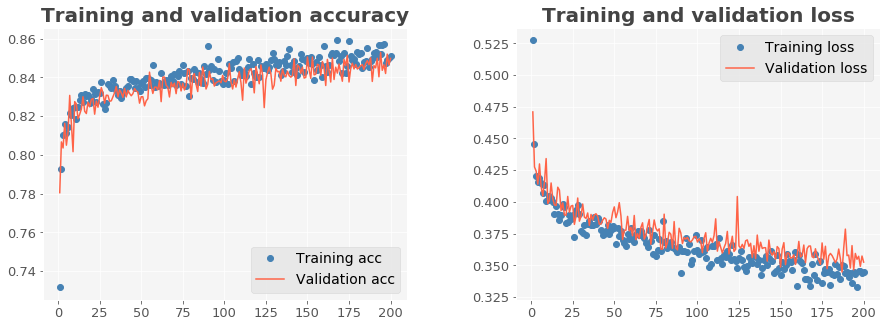

In [23]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 7 ---------------------------------------------------------

In [24]:
def model_7(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [25]:
logs = train_model(model_7, lr=0.001, epochs=40, epoch_steps=140, valid_steps=10, batch_size=60, image_size=(50, 50))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 2, 128)         147584    
__________

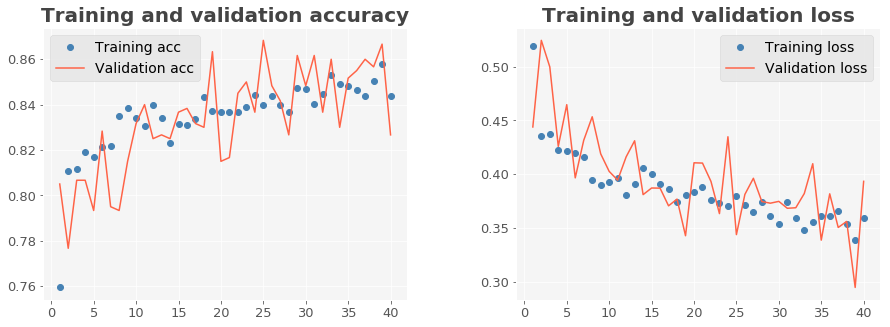

In [26]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])